# Supervised learning

## Supervised Machine Learning Algorithms

## Some Sample Datasets

## Forge dataset

This dataset has 26 data points spreaded in 2 classes. Each point has 2 features: x and y values.

In [35]:
import matplotlib.pyplot as plt

import os,sys,inspect
sys.path.insert(0, '..') 
import mglearn

# generate dataset
X, y = mglearn.datasets.make_forge()
print("X.shape:", X.shape)

X.shape: (26, 2)


C:\Users\Emile\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


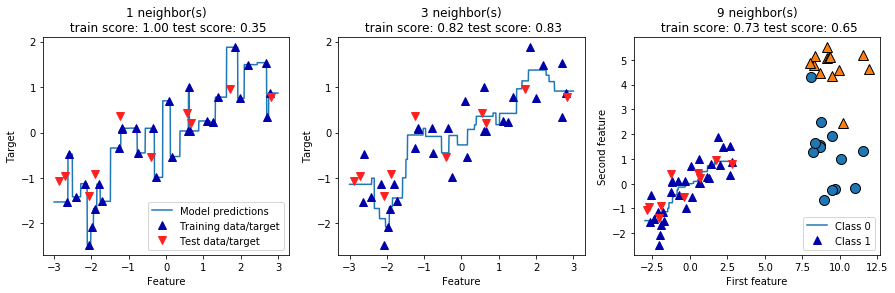

In [36]:
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

## Wave dataset

Each point has 2 features: x and y values.

In [37]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

Text(0, 0.5, 'Target')

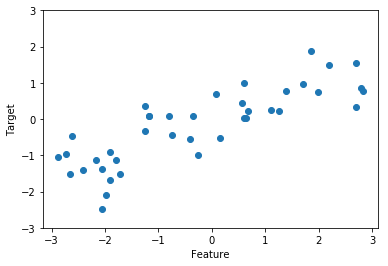

In [38]:
# plot dataset
plt.show()

## Cancer dataset

This dataset contains sizes and measurements of tumors. Each point has one of the two possible labels: benign or malignant.

In [39]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['filename', 'feature_names', 'DESCR', 'target_names', 'data', 'target'])


In [40]:
print("Shape of cancer data:", cancer.data.shape)

Shape of cancer data: (569, 30)


In [41]:
import numpy as np
print("Sample counts per class:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {'malignant': 212, 'benign': 357}


In [42]:
print("Feature names:\n", cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## Boston housing dataset

This dataset contains the price of homes in a given Boston suburb in the mid-1970s, given a few data points about the suburb at the time, such as the crime rate, the local property tax rate, etc.

In [43]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:", boston.data.shape)

Data shape: (506, 13)


In [44]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


## Supervised Machine Learning Algorithms

## k-Nearest Neighbors

This algorithm makes predictions on a new data points by finding data points which are closer to the training set.

## k-Nearest Neighbors - Classification

The simplest implementation of the k-NN algorithm uses only the single closest point (neighbor) to the new data point which we are trying to make a prediction on. Let's plot this version of the k-NN algorithm:

C:\Users\Emile\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


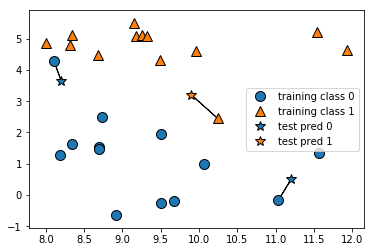

In [45]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.show()

Instead of only using the single closest point to the new data point which we are trying to make a prediction on we can use any number of closest point (k points/neighbors). Let's plot this using k=3 (3 neighbors):

C:\Users\Emile\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


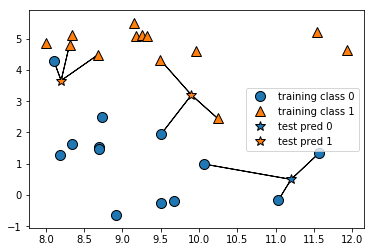

In [46]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()

Let's split our data between training and testing sets:

In [47]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\Emile\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Let's build the classifier with 3 neighbors:

In [48]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

Let's train the classifier:

In [49]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

Let's test our classifier:

In [50]:
print("Test set predictions:", clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


In [51]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


## k-Nearest Neighbors - Analyzing KNeighborsClassifier

Let's visualize our predictions on the test set in 2D plots and add a shade for each of the 2 class area. This wil help us to visualize the decision boundary for k = 1, 3, 9.

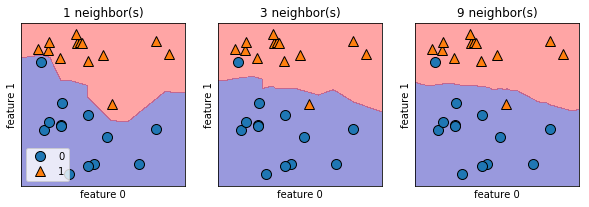

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
plt.show()

Let's visualize the effects of k on the classifier accuracy:

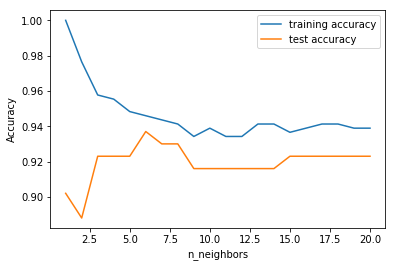

In [53]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 20
neighbors_settings = range(1, 21)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

## k-Nearest Neighbors - k-neighbors regression

The k-Nearest Neighbors algorithm can be used with regression in the same way but this time the prediction is the average amongst the point neighbors.

Let's use k-neighbors regression with the Wave dataset.

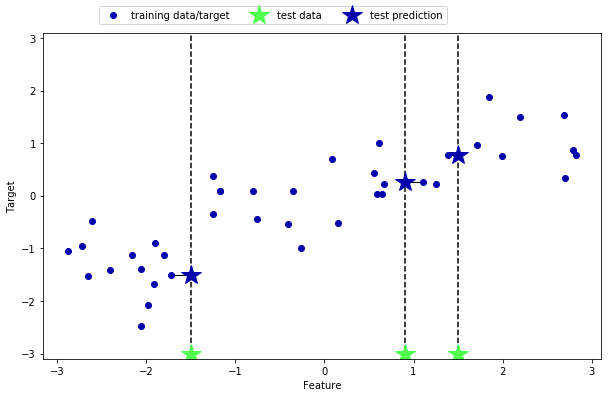

In [54]:
mglearn.plots.plot_knn_regression(n_neighbors=1)
plt.show()

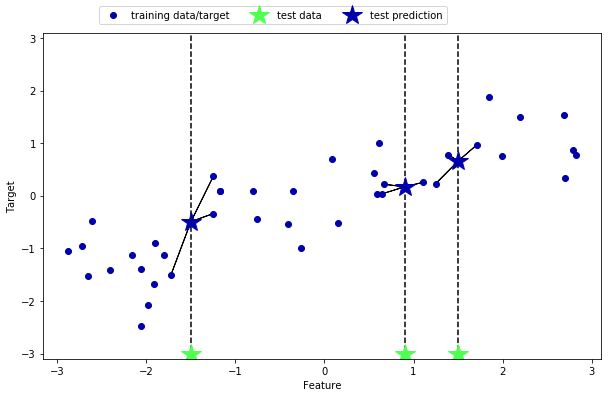

In [55]:
mglearn.plots.plot_knn_regression(n_neighbors=3)
plt.show()

Let's implement and train our KNeighborsRegressor model:

In [56]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

Let's do some predictions on the test set:

In [57]:
print("Test set predictions:\n", reg.predict(X_test))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


Let's return our coefficient of determination R^2 which is a mesure of the quality of our model prediction. R^2=1 is a perfect prediction and R^2=0 means that the model is constant and only predicts the average of the answers of the y_train set. 

In [58]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


## k-Nearest Neighbors - Analyzing KNeighborsRegressor

Let's create a test set to with a large amount of data points on the x axis which are of the same feature.

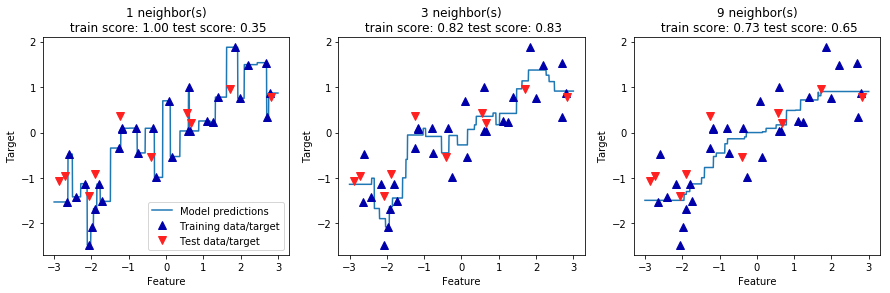

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")
plt.show()

We can see that our prediction with 1 neighbor passes through each data point. This is a bad prediction. We can also observe that augmenting the amount of neighbors leads to better predictions.

## Linear Models

Linear models are very common type of model. This type of model does predictions using a linear function of the input data features.

## Linear Models - Linear models for regression

For a dataset with only one feature, the prediction fomrula of the linear model would be: y = w[0] * x[0] + b and for a dataset with p features: y = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b.

Here w[0] is the slope of the line and b is the y-intercept (where the line crosses the y-axis).

w[0]: 0.393906  b: -0.031804


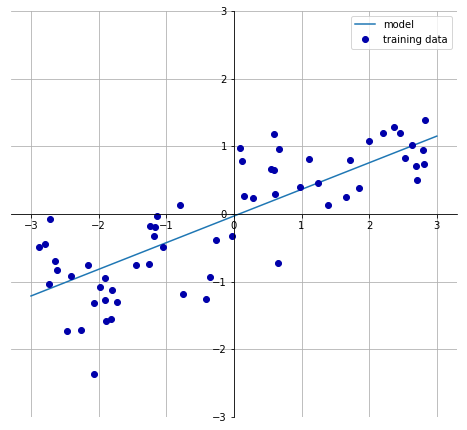

In [62]:
mglearn.plots.plot_linear_regression_wave()
plt.show()

## Linear Models - Linear regression aka ordinary least squares

In [63]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [64]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.03180434302675973


In [65]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [66]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [67]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


## Linear Models - Ridge regression

## Linear Models - Lasso

## Linear Models - Linear models for classification

## Linear Models - Linear models for multiclass classification

## Linear Models - Strengths, weaknesses and parameters

## Naive Bayes Classifiers

## Decision trees

## Decision trees - Building decision trees

## Decision trees - Controlling complexity of decision trees

## Decision trees - Analyzing Decision Trees

## Decision trees - Feature Importance in trees

## Random forests

## Random forests - Building random forests

## Random forests - Analyzing random forests

## Gradient Boosted Regression Trees (Gradient Boosting Machines)

## Kernelized Support Vector Machines

## Kernelized Support Vector Machines - Linear Models and Non-linear Features

## The Kernel Trick

## The Kernel Trick - Understanding SVMs

## The Kernel Trick - Tuning SVM parameters

## The Kernel Trick - Preprocessing data for SVMs

## Neural Networks (Deep Learning)

## Neural Networks (Deep Learning) - The Neural Network Model

## Neural Networks (Deep Learning) - Tuning Neural Networks

## Uncertainty estimates from classifiers

## Uncertainty estimates from classifiers - The Decision Function

## Uncertainty estimates from classifiers - Predicting Probabilities

## Uncertainty estimates from classifiers - Uncertainty in multiclass classification